# Exploring Visualizations
There are several different libraries that are available for data visualization. Create some visualizations using the Pumpkin data in this lesson with matplotlib and seaborn in a sample notebook. Which libraries are easier to work with?

## Exploring Pumpkin price per city

Let's first load the daset into Pandas dataframe

In [18]:
import pandas as pd
pumpkins = pd.read_csv('data/US-pumpkins.csv')
pumpkins.head()

,City Name,Type,Package,Variety,Sub Variety,Grade,Date,Low Price,High Price,Mostly Low,...,Unit of Sale,Quality,Condition,Appearance,Storage,Crop,Repack,Trans Mode,Unnamed: 24,Unnamed: 25
0,BALTIMORE,NaN,24 inch bins,NaN,NaN,NaN,4/29/17,270.0,280.0,270.0,...,NaN,NaN,NaN,NaN,NaN,NaN,E,NaN,NaN,NaN
1,BALTIMORE,NaN,24 inch bins,NaN,NaN,NaN,5/6/17,270.0,280.0,270.0,...,NaN,NaN,NaN,NaN,NaN,NaN,E,NaN,NaN,NaN
2,BALTIMORE,NaN,24 inch bins,HOWDEN TYPE,NaN,NaN,9/24/16,160.0,160.0,160.0,...,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN
3,BALTIMORE,NaN,24 inch bins,HOWDEN TYPE,NaN,NaN,9/24/16,160.0,160.0,160.0,...,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN
4,BALTIMORE,NaN,24 inch bins,HOWDEN TYPE,NaN,NaN,11/5/16,90.0,100.0,90.0,...,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN


Since our data is loaded as pandas dataframe, we can check if there are missing values in the data.

In [2]:
pumpkins.isnull().sum()

City Name             0
Type               1712
Package               0
Variety               5
Sub Variety        1461
Grade              1757
Date                  0
Low Price             0
High Price            0
Mostly Low          103
Mostly High         103
Origin                3
Origin District    1626
Item Size           279
Color               616
Environment        1757
Unit of Sale       1595
Quality            1757
Condition          1757
Appearance         1757
Storage            1757
Crop               1757
Repack                0
Trans Mode         1757
Unnamed: 24        1757
Unnamed: 25        1654
dtype: int64

To make my dataframe easier to work with, I drop several of its features that are not relevant to my intended task, using drop(), leaving only the desired columns

In [19]:
new_columns = ['City Name', 'Package', 'Low Price', 'High Price',]
pumpkins = pumpkins.drop([c for c in pumpkins.columns if c not in new_columns], axis=1)

In [4]:
pumpkins.head()

,City Name,Package,Low Price,High Price
0,BALTIMORE,24 inch bins,270.0,280.0
1,BALTIMORE,24 inch bins,270.0,280.0
2,BALTIMORE,24 inch bins,160.0,160.0
3,BALTIMORE,24 inch bins,160.0,160.0
4,BALTIMORE,24 inch bins,90.0,100.0


We then  determine the average price of a pumpkin in a given city using the  Low Price and High Price columns to populate the new Price column

In [20]:
price = (pumpkins['Low Price'] + pumpkins['High Price']) / 2

In [7]:
print (price)

0       275.00
1       275.00
2       160.00
3       160.00
4        95.00
         ...  
1752     14.75
1753    275.00
1754    275.00
1755    275.00
1756    275.00
Length: 1757, dtype: float64


Let's now copy our converted data into a fresh Pandas dataframe:

In [21]:
new_pumpkins = pd.DataFrame({'City':pumpkins['City Name'] , 'Package': pumpkins['Package'], 'Low Price': pumpkins['Low Price'],'High Price': pumpkins['High Price'], 'Price': price})

In [10]:
new_pumpkins.head()

,City,Package,Low Price,High Price,Price
0,BALTIMORE,24 inch bins,270.0,280.0,275.0
1,BALTIMORE,24 inch bins,270.0,280.0,275.0
2,BALTIMORE,24 inch bins,160.0,160.0,160.0
3,BALTIMORE,24 inch bins,160.0,160.0,160.0
4,BALTIMORE,24 inch bins,90.0,100.0,95.0


In [13]:
new_pumpkins.tail()

,City,Package,Low Price,High Price,Price
1752,ST. LOUIS,22 lb cartons,14.75,14.75,14.75
1753,ST. LOUIS,36 inch bins,275.00,275.00,275.00
1754,ST. LOUIS,36 inch bins,275.00,275.00,275.00
1755,ST. LOUIS,36 inch bins,275.00,275.00,275.00
1756,ST. LOUIS,36 inch bins,275.00,275.00,275.00


Printing out our dataframe will show you a clean, tidy dataset on which we can build your new regression model.

But, If you look at the Package column, pumpkins are sold in many different configurations. Some are sold in '1 1/9 bushel' measures, and some in '1/2 bushel' measures, some per pumpkin, some per pound, and some in big boxes with varying widths.

So let's filter them by selecting only pumpkins with the string 'bins' in their Package column.

In [22]:
pumpkins = pumpkins[pumpkins['Package'].str.contains('bins', case=True, regex=True)]

In [16]:
new_pumpkins.head()

,City,Package,Low Price,High Price,Price
0,BALTIMORE,24 inch bins,270.0,280.0,275.0
1,BALTIMORE,24 inch bins,270.0,280.0,275.0
2,BALTIMORE,24 inch bins,160.0,160.0,160.0
3,BALTIMORE,24 inch bins,160.0,160.0,160.0
4,BALTIMORE,24 inch bins,90.0,100.0,95.0


In [12]:
print(len(pumpkins))

1227


Printing the data now, we can see that we are only getting the 1227 or so rows of data containing pumpkins by the bins.

Now it's time to create some basic plots to display the new dataframe we just created. What would a basic line plot show?

Import Matplotlib at the top of the file, under the Pandas import.

In [23]:
import matplotlib.pyplot as plt

Let's use scatter plot and see

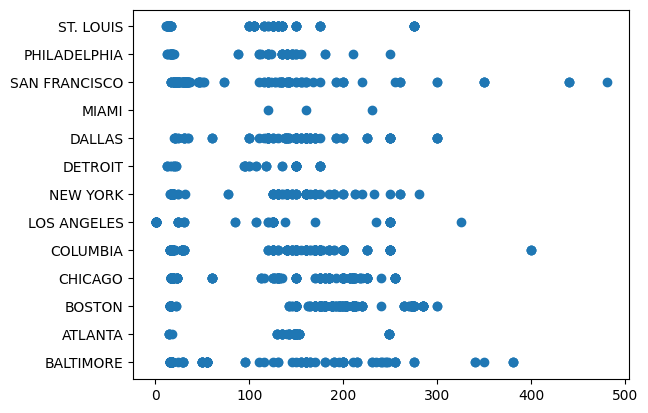

In [27]:
price = new_pumpkins.Price
city = new_pumpkins.City
plt.scatter(price, city)
plt.show()

The plot is not particularly useful as all it does is display in your data as a spread of points in a given city.

To get charts to display useful data, you usually need to group the data somehow. Let's try creating a plot where the y axis shows the city and the data demonstrates the distribution of data.

Text(0, 0.5, 'Pumpkin Price')

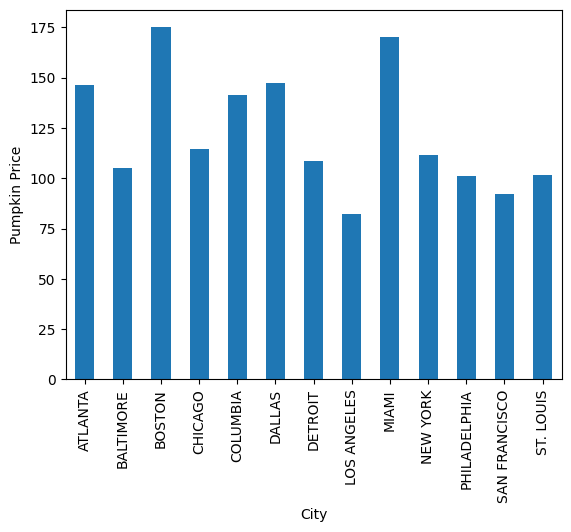

In [28]:
new_pumpkins.groupby(['City'])['Price'].mean().plot(kind='bar')
plt.ylabel("Pumpkin Price")

That's pretty useful! We can see that the cities with the highest price of Pumpkin are Chocago and Miami.